<a href="https://colab.research.google.com/github/RafaelSJ0/Aulas-Mack/blob/main/Analise%20de%20sentimento%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

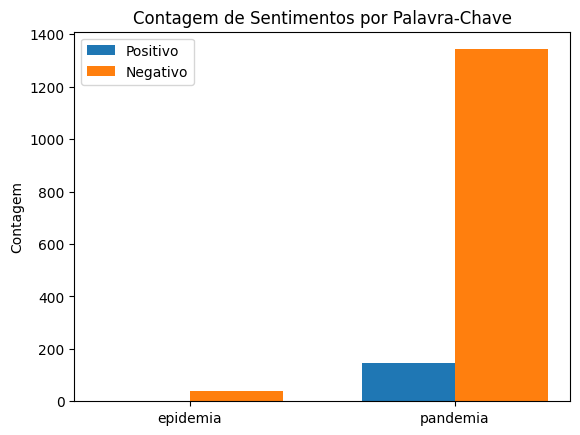

In [3]:
import requests
import json
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Faz a requisição para obter os dados em formato JSON
url = 'https://raw.githubusercontent.com/lucianomcsilva/articulistas/main/UolBlogs.json'
response = requests.get(url)
data = response.json()

# Lista de palavras-chave
keywords = ['epidemia', 'pandemia']

# Inicializa o analisador de sentimentos
sia = SentimentIntensityAnalyzer()

# Dicionários para contar os sentimentos positivos e negativos
positive_counts = {}
negative_counts = {}

# Itera sobre os dados
for item in data:
    # Extrai o título e o conteúdo do item
    title = item['title']
    content = item['content']
    
    # Realiza a análise de sentimento para cada palavra-chave
    for keyword in keywords:
        if keyword in title or keyword in content:
            # Calcula o score de sentimento para o título e o conteúdo
            title_sentiment_score = sia.polarity_scores(title)['compound']
            content_sentiment_score = sia.polarity_scores(content)['compound']
            
            # Classifica o sentimento como positivo, negativo ou neutro
            if title_sentiment_score > 0 or content_sentiment_score > 0:
                if keyword in positive_counts:
                    positive_counts[keyword] += 1
                else:
                    positive_counts[keyword] = 1
            elif title_sentiment_score < 0 or content_sentiment_score < 0:
                if keyword in negative_counts:
                    negative_counts[keyword] += 1
                else:
                    negative_counts[keyword] = 1

# Cria um gráfico de barras para exibir os resultados
labels = list(keywords)
positive_values = [positive_counts.get(keyword, 0) for keyword in keywords]
negative_values = [negative_counts.get(keyword, 0) for keyword in keywords]

x = list(range(len(labels)))  # Converter o objeto range para uma lista
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([val - width/2 for val in x], positive_values, width, label='Positivo')  # Ajuste para subtrair width/2 de cada valor em x
rects2 = ax.bar([val + width/2 for val in x], negative_values, width, label='Negativo')  # Ajuste para adicionar width/2 a cada valor em x

ax.set_ylabel('Contagem')
ax.set_title('Contagem de Sentimentos por Palavra-Chave')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
